In [2]:
%load_ext autoreload
%autoreload 2
import dnn_util as util
import pandas as pd
import os
import seaborn as sns


In [3]:
clusters_of_interest = ['C1', 'C3']
models = {k: util.load_cbp(f'{k}_chrombpnet_nobias.h5') for k in clusters_of_interest}


In [9]:

for cluster, motif, clean_motif_name in [['C1', 'Gata6.Zf_109', 'GATA6'],
                                        ['C3', 'Nkx2.1.Homeobox_182', 'NKX2-1'],
                                       ]: # for NKX - C3
    res_path = f'CBP_scores_{motif}_all.csv'
    print(res_path)
    if not os.path.isfile(res_path):
        cluster_scores = pd.read_csv(f'{motif}.csv', index_col='Unnamed: 0')

        cluster_scores['regulon_tf'] = clean_motif_name
        cluster_scores['count'] = util.get_scores_bpnet(models[cluster], cluster_scores)
        cluster_scores.to_csv(res_path, index=None)

CBP_scores_Gata6.Zf_109_all.csv
CBP_scores_Nkx2.1.Homeobox_182_all.csv


In [39]:
cluster_scores

,seqnames,start,end,width,strand,score,regulon_tf,pcc,jsd,count
1,chr1,858938,858947,10,+,7.952381,NKX2-1,0.987439,-0.044238,0.004950
2,chr1,859003,859012,10,-,7.746377,NKX2-1,0.946447,-0.121706,0.092463
3,chr1,1001843,1001852,10,+,8.706159,NKX2-1,0.982046,-0.035874,0.009376
4,chr1,1053822,1053831,10,-,7.819495,NKX2-1,0.995047,-0.024499,0.003180
5,chr1,1241215,1241224,10,-,8.646773,NKX2-1,0.998465,-0.018604,0.002920
...,...,...,...,...,...,...,...,...,...,...
10279,chrX,154524849,154524858,10,+,7.747199,NKX2-1,0.998691,-0.020311,0.000574
10280,chrX,154799803,154799812,10,-,7.819495,NKX2-1,0.976941,-0.051948,0.012989
10281,chrX,155059048,155059057,10,-,7.952381,NKX2-1,0.946594,-0.091055,0.079168
10282,chrX,155334622,155334631,10,-,7.806585,NKX2-1,0.980359,-0.050582,0.040120


<Axes: xlabel='jsd', ylabel='pcc'>

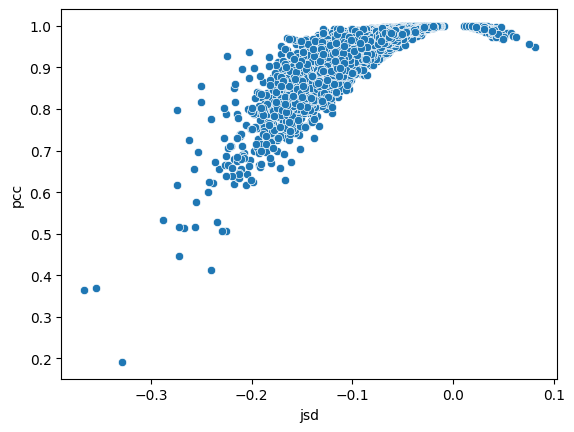

In [41]:
sns.scatterplot(data=cluster_scores, x='jsd', y='pcc')